In [6]:
!pip install pandas
!pip install psycopg2
!pip install scikit-learn

In [10]:
import pandas as pd
import psycopg2 as ps
import re
from tqdm import tqdm
from matplotlib import pyplot as plt
import pickle

In [14]:
connection = ps.connect(dbname = 'realTimeSystem', user = 'postgres', password = 'khilalovartem', host = 'localhost')
cursor = connection.cursor()

In [16]:
# cursor.execute('TRUNCATE public.data')
connection.commit()


In [17]:
cursor.execute(f'''CREATE TABLE IF NOT EXISTS public.data (
    "HeatNo" integer,
    "TotalIngotsWeight" real,
    "PouringScrap" real,
    "OtherScrap" real,
    "Last_EOP" real,
    "Cr_Last_EOP" real,
    "Cr_Final_basic" real,
    "LFVD_FeCrA_basic" real,
    "LFVD_FeCrC_basic" real,
    "Ni_Last_EOP" real,
    "Ni_Final_basic" real,
    "LFVD_NiGran_basic" real,
    "LFVD_NiKatode_basic" real,
    "Mo_Last_EOP" real,
    "Mo_Final_basic" real,
    "LFVD_FeMo_basic" real,
    "LFVD_Polymox_basic" real,
    "V_Last_EOP" real,
    "V_Final_basic" real,
    "LFVD_FeV_basic" real,
    "W_Last_EOP" real,
    "W_Final_basic" real,
    "LFVD_FeW72_basic" real,
    "LFVD_WPaketi_basic" real,
    "Cr_LowerLimit" real,
    "Cr_Target" real,
    "Cr_UpperLimit" real,
    "Cr_Final" real,
    "Ni_LowerLimit" real,
    "Ni_Target" real,
    "Ni_UpperLimit" real,
    "Ni_Final" real,
    "Mo_LowerLimit" real,
    "Mo_Target" real,
    "Mo_UpperLimit" real,
    "Mo_Final" real,
    "V_LowerLimit" real,
    "V_Target" real,
    "V_UpperLimit" real,
    "V_Final" real,
    "W_LowerLimit" real,
    "W_Target" real,
    "W_UpperLimit" real,
    "W_Final" real,
    "FeMo" real,
    "FeV" real,
    "FeMnC" real,
    "FeSi" real,
    "CaO" real,
    "BOKSIT beli" real,
    "Al bloki" real,
    "KARBORITmleti" real,
    "FeCrC" real,
    "SLAGMAG 65B" real,
    "EPZ zlindra" real,
    "CASIfi13" real,
    "Cfi13" real,
    "FeCrC51" real,
    "SiMn" real,
    "FeCrC Si" real,
    "Al zica" real,
    "Borax" real,
    "S žica" real,
    "BOKSIT" real,
    "Mn met" real,
    "Al gran" real,
    "FeCrCSi" real,
    "Ni gran" real,
    "SINT. ŽLINDRA" real,
    "DUŠIK" real,
    "karburit-kosi" real,
    "FeV opl. žica" real,
    "FeS" real,
    "Ni katode" real,
    "LFVD_AlBloki" integer,
    "LFVD_AlGran" integer,
    "LFVD_Boksit" integer,
    "LFVD_CaO" integer,
    "LFVD_CaSi" integer,
    "LFVD_CASIfi13" real,
    "LFVD_Cfi13" real,
    "LFVD_CoMet" integer,
    "LFVD_Cu" integer,
    "LFVD_EPŽŽlindra" integer,
    "LFVD_FeAl" integer,
    "LFVD_FeB" integer,
    "LFVD_FeBŽica" integer,
    "LFVD_FeCrNit" integer,
    "LFVD_FeCrA" integer,
    "LFVD_FeCrC" integer,
    "LFVD_FeCrCSi" integer,
    "LFVD_FeCrC51" integer,
    "LFVD_FeMnA" integer,
    "LFVD_FeMnC" integer,
    "LFVD_FeMo" integer,
    "LFVD_FeNbTa" integer,
    "LFVD_FeNbTafi13" integer,
    "LFVD_FeS" integer,
    "LFVD_FeSi" integer,
    "LFVD_FeSiZrŽica" integer,
    "LFVD_FeTi" integer,
    "LFVD_FeTifi13" integer,
    "LFVD_FeV" integer,
    "LFVD_FeW72" integer,
    "LFVD_KarboritMleti" integer,
    "LFVD_MnMet" integer,
    "LFVD_NiGran" integer,
    "LFVD_NiKatode" integer,
    "LFVD_NiOksid" integer,
    "LFVD_OdpCu" integer,
    "LFVD_Polymox" integer,
    "LFVD_SŽica" real,
    "LFVD_SiMet" integer,
    "LFVD_SiMn" integer,
    "LFVD_SLAGMAG65B" integer,
    "LFVD_KarboritZaVpih" integer,
    "LFVD_Ni90" integer,
    "LFVD_AlŽica" real,
    "LFVD_Molyquick" integer,
    "LFVD_AlOplašèenaŽica" real,
    "LFVD_BelaŽlindra" integer,
    "LFVD_Kisik" integer,
    "LFVD_KalcijevKarbid" integer,
    "LFVD_WPaketi" integer,
    "LFVD_SintŽlindra" integer,
    "LFVD_AlloyWeight" integer,
    "LFVD_NonMetalInclusionsWeight" integer,
    "E3" real,
    "OSIKRO3" real,
    "OCR12" real,
    "VCMO230" real,
    "PK5" real,
    "UTOPMO2" real,
    "EMCR" real,
    "E6" real,
    "OCR12VM OSTRUŽKI" real,
    "OCR12SP" real,
    "PT181" real,
    "CRV" real,
    "E8" real,
    "PK2" real,
    "OSIKRO4" real,
    "PT929" real,
    "UTOP1" real,
    "OH252" real,
    "CRMO OSTRUŽKI" real,
    "PK5M" real,
    "OCR12VM" real,
    "OH255" real,
    "E40" real,
    "ECN150" real,
    "UTOP2" real,
    "UTOPMO4" real,
    "31CRV3" real,
    "PV_MKK" integer,
    "PV_PO102" integer,
    "PV_OCR12SPW" integer,
    "PV_OCR8W" integer,
    "PV_PO180" integer,
    "PV_PT181" integer,
    "PV_PT202" integer,
    "PV_PT212" integer,
    "PV_OH239" integer,
    "PV_OSIKRO3" integer,
    "PV_OW4" integer,
    "PV_OCR8VMS" integer,
    "PV_CRV3" integer,
    "PV_OH250" integer,
    "PV_OH252" integer,
    "PV_OH255" integer,
    "PV_OH257" integer,
    "PV_OH258" integer,
    "PV_OH260" integer,
    "PV_OH236NI" integer,
    "PV_UTOPMONI" integer,
    "PV_PKTB" integer,
    "PV_PK3NI" integer,
    "PV_PK332" integer,
    "PV_PK335" integer,
    "PV_PK338" integer,
    "PV_PK340" integer,
    "PV_PK11S" integer,
    "PV_PK343" integer,
    "PV_18MNCR4" integer,
    "PV_PK346" integer,
    "PV_INVAR36" integer,
    "PV_EMCR" integer,
    "PV_SIVA_LITINA" integer,
    "PV_CK10" integer,
    "PV_OC100EX" integer,
    "PV_EC80" integer,
    "PV_VCMO140" integer,
    "PV_VCMO230" integer,
    "PV_31CRV3" integer,
    "PV_ECN150" integer,
    "PV_ECN35" integer,
    "PV_VCNMO200" integer,
    "PV_UTOPNICU" integer,
    "PV_OH807" integer,
    "PV_OCR4PR" integer,
    "PV_OCR12" integer,
    "PV_OCR12SP" integer,
    "PV_OCR12EX" integer,
    "PV_CRV" integer,
    "PV_TMCN2" integer,
    "PV_TMCN1" integer,
    "PV_OSIKRO4" integer,
    "PV_OW1" integer,
    "PV_OCR12VM" integer,
    "PV_CRV2" integer,
    "PV_OSV1" integer,
    "PV_OW6" integer,
    "PV_145V33" integer,
    "PV_UTOP3" integer,
    "PV_UTOPMO2" integer,
    "PV_UTOPEX1" integer,
    "PV_UTOP1" integer,
    "PV_UTOP2" integer,
    "PV_UTOPCO" integer,
    "PV_UTOPEX3" integer,
    "PV_UTOPMO4" integer,
    "PV_UTOPCO2" integer,
    "PV_OV862" integer,
    "PV_UTOPMO6" integer,
    "PV_UTOP33" integer,
    "PV_UTOPSP" integer,
    "PV_UTOPCO3" integer,
    "PV_BRW" integer,
    "PV_BRW1" integer,
    "PV_BRC" integer,
    "PV_BRM2" integer,
    "PV_BRM1" integer,
    "PV_BRM" integer,
    "PV_BRCV" integer,
    "PV_BRC3" integer,
    "PV_BRU" integer,
    "PV_BRCMO" integer,
    "PV_BRCMO2" integer,
    "PV_UTOPTI" integer,
    "PV_12MN" integer,
    "PV_PK2" integer,
    "PV_RAVNIN2" integer,
    "PV_RAVNIN3" integer,
    "PV_RAVNIN4" integer,
    "PV_PK2SP" integer,
    "PV_PK11" integer,
    "PV_PK12" integer,
    "PV_PK13" integer,
    "PV_PKAS" integer,
    "PV_PK15" integer,
    "PV_PK19" integer,
    "PV_PK20" integer,
    "PV_PT929" integer,
    "PV_PK5" integer,
    "PV_PK5M" integer,
    "PV_28304N" integer,
    "PV_PK939" integer,
    "PV_X45" integer,
    "PV_PK942" integer,
    "PV_RAVNAL2" integer,
    "PV_PK10" integer,
    "PV_19MNCR18" integer,
    "PV_214N" integer,
    "PV_OCR8W_OSTRUŽKI" integer,
    "PV_CRV3_OSTRUŽKI" integer,
    "PV_PK335_OSTRUŽKI" integer,
    "PV_CRMO_OSTRUŽKI" integer,
    "PV_CRMO_DROBIŽ" integer,
    "PV_VCNMO200_DROBIŽ" integer,
    "PV_TMCN2_OSTRUŽKI" integer,
    "PV_OCR12VM_OSTRUŽKI" integer,
    "PV_POSEBNA_JEKLA_OSTRUŽKI" integer,
    "PV_BRM2_OSTRUŽKI" integer,
    "PV_E1" integer,
    "PV_E3" integer,
    "PV_E6" integer,
    "PV_E8" integer,
    "PV_Kore" integer,
    "PV_GRODELJ" integer,
    "PV_E40" integer
);''')

connection.commit()

In [18]:
col_heads = ['HeatNo', 'TotalIngotsWeight', 'PouringScrap', 'OtherScrap', 'Last_EOP', 'Cr_Last_EOP', 'Cr_Final_basic', 'LFVD_FeCrA_basic', 'LFVD_FeCrC_basic', 'Ni_Last_EOP', 'Ni_Final_basic', 'LFVD_NiGran_basic', 'LFVD_NiKatode_basic', 'Mo_Last_EOP', 'Mo_Final_basic', 'LFVD_FeMo_basic', 'LFVD_Polymox_basic', 'V_Last_EOP', 'V_Final_basic', 'LFVD_FeV_basic', 'W_Last_EOP', 'W_Final_basic', 'LFVD_FeW72_basic', 'LFVD_WPaketi_basic', 'Cr_LowerLimit', 'Cr_Target', 'Cr_UpperLimit', 'Cr_Final', 'Ni_LowerLimit', 'Ni_Target', 'Ni_UpperLimit', 'Ni_Final', 'Mo_LowerLimit', 'Mo_Target', 'Mo_UpperLimit', 'Mo_Final', 'V_LowerLimit', 'V_Target', 'V_UpperLimit', 'V_Final', 'W_LowerLimit', 'W_Target', 'W_UpperLimit', 'W_Final', 'FeMo', 'FeV', 'FeMnC', 'FeSi', 'CaO', 'BOKSIT beli', 'Al bloki', 'KARBORITmleti', 'FeCrC', 'SLAGMAG 65B', 'EPZ zlindra', 'CASIfi13', 'Cfi13', 'FeCrC51', 'SiMn', 'FeCrC Si', 'Al zica', 'Borax', 'S žica', 'BOKSIT', 'Mn met', 'Al gran', 'FeCrCSi', 'Ni gran', 'SINT. ŽLINDRA', 'DUŠIK', 'karburit-kosi', 'FeV opl. žica', 'FeS', 'Ni katode', 'LFVD_AlBloki', 'LFVD_AlGran', 'LFVD_Boksit', 'LFVD_CaO', 'LFVD_CaSi', 'LFVD_CASIfi13', 'LFVD_Cfi13', 'LFVD_CoMet', 'LFVD_Cu', 'LFVD_EPŽŽlindra', 'LFVD_FeAl', 'LFVD_FeB', 'LFVD_FeBŽica', 'LFVD_FeCrNit', 'LFVD_FeCrA', 'LFVD_FeCrC', 'LFVD_FeCrCSi', 'LFVD_FeCrC51', 'LFVD_FeMnA', 'LFVD_FeMnC', 'LFVD_FeMo', 'LFVD_FeNbTa', 'LFVD_FeNbTafi13', 'LFVD_FeS', 'LFVD_FeSi', 'LFVD_FeSiZrŽica', 'LFVD_FeTi', 'LFVD_FeTifi13', 'LFVD_FeV', 'LFVD_FeW72', 'LFVD_KarboritMleti', 'LFVD_MnMet', 'LFVD_NiGran', 'LFVD_NiKatode', 'LFVD_NiOksid', 'LFVD_OdpCu', 'LFVD_Polymox', 'LFVD_SŽica', 'LFVD_SiMet', 'LFVD_SiMn', 'LFVD_SLAGMAG65B', 'LFVD_KarboritZaVpih', 'LFVD_Ni90', 'LFVD_AlŽica', 'LFVD_Molyquick', 'LFVD_AlOplašèenaŽica', 'LFVD_BelaŽlindra', 'LFVD_Kisik', 'LFVD_KalcijevKarbid', 'LFVD_WPaketi', 'LFVD_SintŽlindra', 'LFVD_AlloyWeight', 'LFVD_NonMetalInclusionsWeight', 'E3', 'OSIKRO3', 'OCR12', 'VCMO230', 'PK5', 'UTOPMO2', 'EMCR', 'E6', 'OCR12VM OSTRUŽKI', 'OCR12SP', 'PT181', 'CRV', 'E8', 'PK2', 'OSIKRO4', 'PT929', 'UTOP1', 'OH252', 'CRMO OSTRUŽKI', 'PK5M', 'OCR12VM', 'OH255', 'E40', 'ECN150', 'UTOP2', 'UTOPMO4', '31CRV3', 'PV_MKK', 'PV_PO102', 'PV_OCR12SPW', 'PV_OCR8W', 'PV_PO180', 'PV_PT181', 'PV_PT202', 'PV_PT212', 'PV_OH239', 'PV_OSIKRO3', 'PV_OW4', 'PV_OCR8VMS', 'PV_CRV3', 'PV_OH250', 'PV_OH252', 'PV_OH255', 'PV_OH257', 'PV_OH258', 'PV_OH260', 'PV_OH236NI', 'PV_UTOPMONI', 'PV_PKTB', 'PV_PK3NI', 'PV_PK332', 'PV_PK335', 'PV_PK338', 'PV_PK340', 'PV_PK11S', 'PV_PK343', 'PV_18MNCR4', 'PV_PK346', 'PV_INVAR36', 'PV_EMCR', 'PV_SIVA_LITINA', 'PV_CK10', 'PV_OC100EX', 'PV_EC80', 'PV_VCMO140', 'PV_VCMO230', 'PV_31CRV3', 'PV_ECN150', 'PV_ECN35', 'PV_VCNMO200', 'PV_UTOPNICU', 'PV_OH807', 'PV_OCR4PR', 'PV_OCR12', 'PV_OCR12SP', 'PV_OCR12EX', 'PV_CRV', 'PV_TMCN2', 'PV_TMCN1', 'PV_OSIKRO4', 'PV_OW1', 'PV_OCR12VM', 'PV_CRV2', 'PV_OSV1', 'PV_OW6', 'PV_145V33', 'PV_UTOP3', 'PV_UTOPMO2', 'PV_UTOPEX1', 'PV_UTOP1', 'PV_UTOP2', 'PV_UTOPCO', 'PV_UTOPEX3', 'PV_UTOPMO4', 'PV_UTOPCO2', 'PV_OV862', 'PV_UTOPMO6', 'PV_UTOP33', 'PV_UTOPSP', 'PV_UTOPCO3', 'PV_BRW', 'PV_BRW1', 'PV_BRC', 'PV_BRM2', 'PV_BRM1', 'PV_BRM', 'PV_BRCV', 'PV_BRC3', 'PV_BRU', 'PV_BRCMO', 'PV_BRCMO2', 'PV_UTOPTI', 'PV_12MN', 'PV_PK2', 'PV_RAVNIN2', 'PV_RAVNIN3', 'PV_RAVNIN4', 'PV_PK2SP', 'PV_PK11', 'PV_PK12', 'PV_PK13', 'PV_PKAS', 'PV_PK15', 'PV_PK19', 'PV_PK20', 'PV_PT929', 'PV_PK5', 'PV_PK5M', 'PV_28304N', 'PV_PK939', 'PV_X45', 'PV_PK942', 'PV_RAVNAL2', 'PV_PK10', 'PV_19MNCR18', 'PV_214N', 'PV_OCR8W_OSTRUŽKI', 'PV_CRV3_OSTRUŽKI', 'PV_PK335_OSTRUŽKI', 'PV_CRMO_OSTRUŽKI', 'PV_CRMO_DROBIŽ', 'PV_VCNMO200_DROBIŽ', 'PV_TMCN2_OSTRUŽKI', 'PV_OCR12VM_OSTRUŽKI', 'PV_POSEBNA_JEKLA_OSTRUŽKI', 'PV_BRM2_OSTRUŽKI', 'PV_E1', 'PV_E3', 'PV_E6', 'PV_E8', 'PV_Kore', 'PV_GRODELJ', 'PV_E40']

In [21]:
FILE_PATH = '/Users/artemkhilalov/Downloads/Real-time-systems-main/PQM.xlsx'

In [22]:
xls = pd.ExcelFile(FILE_PATH)

In [23]:
tables = xls.sheet_names

### Вносим данные в БД:

In [24]:
for table in tables:
    if table in ["Table5 (temps)", "Table7 (head)"]:
        continue
    
    print(table)
    
    if table == "Table1 (basic)":
        sheet_data = xls.parse(table, skiprows = [0]).to_dict('records')
        
        all_records = len(sheet_data)
        ind = 0
        
        data = []
        
        for row in tqdm(sheet_data):
            ind += 1
#             print(f'{ind} of {all_records}')
            cursor.execute(f'SELECT * FROM data WHERE "HeatNo" = {row["HeatNo"]}')
            res = cursor.fetchone()
            if not res:
                temp = ["0.0"] * len(col_heads)
                temp[0] = str(row["HeatNo"])
                data.append(temp)
            
                insert_vals_template = ", ".join(temp)
                query = f"INSERT INTO data VALUES({insert_vals_template})"
                cursor.execute(query)
            connection.commit()
        
            for key in list(row.keys())[11:]:
                if row[key] != row[key]:
                    query = f'DELETE FROM data WHERE "HeatNo" = {row["HeatNo"]}'
                    cursor.execute(query)
                elif row[key] == row[key] and row[key] != 0.0:
                    query = f'UPDATE data SET "{key}" = {row[key]} WHERE "HeatNo" = {row["HeatNo"]}'
                    cursor.execute(query)
        connection.commit()
    
    elif table in ["Table2 (limits)", "Table4 (alloys)", "Table6 (weights)", "Table9 (all. scr.)", "Table10 (unall. scr.)"]:
        split_ind = 1
        if table == "Table2 (limits)":
            split_ind = 11
        
        sheet_data = xls.parse(table, skiprows = [0]).to_dict('records')
        
        all_records = len(sheet_data)
        ind = 0
        
        for row in tqdm(sheet_data):
            ind += 1
#             print(f'{ind} of {all_records}')
            
            for key in list(row.keys())[split_ind:]:
                if row[key] != row[key]:
                    query = f'DELETE FROM data WHERE "HeatNo" = {row["HeatNo"]}'
                    cursor.execute(query)
                elif row[key] == row[key] and row[key] != 0.0:
                    query = f'UPDATE data SET "{key}" = {row[key]} WHERE "HeatNo" = {row["HeatNo"]}'
                    cursor.execute(query)
        connection.commit()
    
        
    elif table == "Table3 (events)":
        df1 = pd.read_excel(FILE_PATH, sheet_name = table, skiprows = [0])
        metals = ['FeMo', 'FeV', 'FeMnC', 'FeSi', 'CaO', 'BOKSIT beli', 'Al bloki', 'KARBORITmleti', 'FeCrC', 'SLAGMAG 65B', 'EPZ zlindra', 'CASIfi13', 'Cfi13', 'FeCrC51', 'SiMn', 'FeCrC Si', 'Al zica', 'Borax', 'S žica', 'BOKSIT', 'Mn met', 'Al gran', 'FeCrCSi', 'Ni gran', 'SINT. ŽLINDRA', 'DUŠIK', 'karburit-kosi', 'FeV opl. žica', 'FeS', 'Ni katode']
        
        for metal in metals:
            df1[metal] = df1['EventText'].apply(lambda x: float(re.findall('\d+,\d+', x)[-1].replace(",","."))  if (metal in x ) else 0)
        
        df2 = df1[['HeatNo'] + metals].groupby(by = 'HeatNo').sum()
        
        HeatNumbers = set(list(df2[metals[0]].keys())) # Можно указать любой металл, я просто хочу получить массив имеющихся HeatNo
        
        all_records = len(HeatNumbers)
        ind = 0
        
        for HeatNo in tqdm(HeatNumbers):
            ind += 1
#             print(f'{ind} of {all_records}')
            
            for metal in metals:
                if df2[metal][HeatNo] != df2[metal][HeatNo]:
                    query = f'DELETE FROM data WHERE "HeatNo" = {row["HeatNo"]}'
                    cursor.execute(query)
                elif df2[metal][HeatNo] == df2[metal][HeatNo] and df2[metal][HeatNo] != 0.0:
                    query = f'UPDATE data SET "{metal}" = {df2[metal][HeatNo]} WHERE "HeatNo" = {HeatNo}'
                    cursor.execute(query)
        connection.commit()
    
    elif table == "Table8 (scrap)":
        sheet_data = xls.parse(table, skiprows = [0]).to_dict('records')
        
        all_records = len(sheet_data)
        ind = 0
        
        for row in tqdm(sheet_data):
            ind += 1
#             print(f'{ind} of {all_records}')
            
            fills = {}
            
            for fill in range(1, 7):
                title = row[f'Fill#{fill}_ScrapName']
                if title != title:
                    continue
                    
                if title not in fills:
                    fills[title] = 0
                
                fills[title] += row[f'Fill#{fill}_ScrapWeight']
            
            cursor.execute(f'SELECT * FROM data WHERE "HeatNo" = {row["HeatNo"]}')
            heat = cursor.fetchone()
            if heat:
                for fill in fills:
                    if fills[fill] != 0.0:
                        query = f'UPDATE data SET "{fill}" = {heat[col_heads.index(fill)] + fills[fill]} WHERE "HeatNo" = {row["HeatNo"]}'
                        cursor.execute(query)
                    
        connection.commit()    
    
    print(f'{table} - complete')

Table1 (basic)


100%|██████████| 3610/3610 [00:35<00:00, 100.80it/s]


Table1 (basic) - complete
Table2 (limits)


100%|██████████| 3606/3606 [01:52<00:00, 32.09it/s]


Table2 (limits) - complete
Table3 (events)


100%|██████████| 3582/3582 [01:58<00:00, 30.15it/s]


Table3 (events) - complete
Table4 (alloys)


100%|██████████| 3582/3582 [01:46<00:00, 33.62it/s]


Table4 (alloys) - complete
Table6 (weights)


100%|██████████| 3590/3590 [00:14<00:00, 252.40it/s]


Table6 (weights) - complete
Table8 (scrap)


100%|██████████| 3588/3588 [00:25<00:00, 138.89it/s]


Table8 (scrap) - complete
Table9 (all. scr.)


100%|██████████| 3588/3588 [00:15<00:00, 232.64it/s]


Table9 (all. scr.) - complete
Table10 (unall. scr.)


100%|██████████| 3588/3588 [00:07<00:00, 507.08it/s]

Table10 (unall. scr.) - complete


### Выведем статистику брака:

In [25]:
metals = ['Cr', 'Ni', 'Mo', 'V', 'W']
summa = 0
for metal in metals:
    cursor.execute(f'SELECT "HeatNo", "TotalIngotsWeight", "{metal}_LowerLimit", "{metal}_UpperLimit", "{metal}_Final" FROM data WHERE ("{metal}_Final" > "{metal}_UpperLimit") OR ("{metal}_Final" < "{metal}_LowerLimit")')
    res = cursor.fetchall()
    df = pd.DataFrame(res, columns = ['HeatNo', 'TotalIngotsWeight', f'{metal}_LowerLimit', '{metal}_UpperLimit', '{metal}_Final'])
    print(f'{metal}: {df["TotalIngotsWeight"].sum() / 10000} т/год')
    summa += df['TotalIngotsWeight'].sum() / 10000

print(f'Total: {summa} т/год')

Cr: 93.226 т/год
Ni: 327.534 т/год
Mo: 121.3615 т/год
V: 183.4955 т/год
W: 141.4415 т/год
Total: 867.0585 т/год


## Экономическая эффективность

Цена 1 тонны OCR12VM равна 1000 $/тонна
Цена 1 кг FeV равна 2000 руб./кг
Цена 1 кг FeMo равна 1600 руб./кг
Цена 1 кг FeCr равна 1900 руб./кг


### Рассмотрим FeCr:

In [26]:
cursor.execute('SELECT COUNT("HeatNo") FROM data')
res = cursor.fetchone()[0]

cursor.execute('SELECT COUNT("HeatNo") FROM data WHERE ("Cr_Final" > "Cr_Target")')
res1 = cursor.fetchone()[0]

used_more_Cr_percent = res1 / res # Доля заготовок, в которых Cr больше, чем было запланировано
print(used_more_Cr_percent)

0.4119477286869944


In [27]:
cursor.execute('SELECT "HeatNo", "Cr_Target", "Cr_Final" FROM data WHERE ("Cr_Final" > "Cr_Target")')
res = cursor.fetchall()

df = pd.DataFrame(res, columns = ['HeatNo', 'Cr_Target', 'Cr_Final'])

sred_percent_Cr = (df['Cr_Final'] - df['Cr_Target']).mean() # Средний процент отклонения
print(sred_percent_Cr)

0.08469033232628405


In [28]:
cursor.execute('SELECT "FeCrC", "FeCrC51", "FeCrC Si", "FeCrCSi" FROM data')
res = cursor.fetchall()

df = pd.DataFrame(res, columns = ['FeCrC', 'FeCrC51', 'FeCrC Si', 'FeCrCSi'])
summa_kg = 0
for metal in df.keys():
#     print(f'{metal}: {df[metal].sum() / 10000 * 0.4 * 0.0008}')
#     print(f'{metal}: {df[metal].sum() / 10000}')
    summa_kg += df[metal].sum() / 10000

print(f'Total: {summa_kg}')
used_Cr_tonns = summa_kg * used_more_Cr_percent * sred_percent_Cr

Total: 258.41029999999995


In [29]:
Cr_price = used_Cr_tonns * 1000 * 1900
print(f'FeCr использовал {used_Cr_tonns} т. - это ~ {Cr_price} руб.')

FeCr использовали 9.01541597355321 т. - это ~ 17129290.3497511 руб.


### Рассмотрим FeMo:

In [30]:
cursor.execute('SELECT COUNT("HeatNo") FROM data')
res = cursor.fetchone()[0]

cursor.execute('SELECT COUNT("HeatNo") FROM data WHERE ("Mo_Final" > "Mo_Target")')
res1 = cursor.fetchone()[0]

used_more_Mo_percent = res1 / res # Доля заготовок, в которых Mo больше, чем было запланировано
print(used_more_Mo_percent)

0.6729931549471064


In [31]:
cursor.execute('SELECT "HeatNo", "Mo_Target", "Mo_Final" FROM data WHERE ("Mo_Final" > "Mo_Target")')
res = cursor.fetchall()

df = pd.DataFrame(res, columns = ['HeatNo', 'Mo_Target', 'Mo_Final'])

sred_percent_Mo = (df['Mo_Final'] - df['Mo_Target']).mean() # Средний процент отклонения
print(sred_percent_Mo)

0.022847896440129464


In [32]:
cursor.execute('SELECT "FeMo" FROM data')
res = cursor.fetchall()

df = pd.DataFrame(res, columns = ['FeMo'])
summa_kg = 0
for metal in df.keys():
    # print(f'{metal}: {df[metal].sum() / 10000 * 0.4 * 0.0008}')
    # print(f'{metal}: {df[metal].sum() / 10000}')
    summa_kg += df[metal].sum() / 10000

print(f'Total: {summa_kg}')
used_Mo_tonns = summa_kg * used_more_Mo_percent * sred_percent_Mo

Total: 40.4986


In [33]:
Mo_price = used_Mo_tonns * 1000 * 1600
print(f'FeMo использовали {used_Mo_tonns} т. - это ~ {Mo_price} руб.')

FeMo использовали 0.6227258282514005 т. - это ~ 996361.325202241 руб.


### Рассмотрим FeV:

In [34]:
cursor.execute('SELECT COUNT("HeatNo") FROM data')
res = cursor.fetchone()[0]

cursor.execute('SELECT COUNT("HeatNo") FROM data WHERE ("V_Final" > "V_Target")')
res1 = cursor.fetchone()[0]

used_more_V_percent = res1 / res # Доля заготовок, в которых V больше, чем было запланировано
print(used_more_V_percent)

0.32514001244555074


In [35]:
cursor.execute('SELECT "HeatNo", "V_Target", "V_Final" FROM data WHERE ("V_Final" > "V_Target")')
res = cursor.fetchall()

df = pd.DataFrame(res, columns = ['HeatNo', 'V_Target', 'V_Final'])

sred_percent_V = (df['V_Final'] - df['V_Target']).mean() # Средний процент отклонения
print(sred_percent_V)

0.019980861244019148


In [36]:
cursor.execute('SELECT "FeV", "FeV opl. žica" FROM data')
res = cursor.fetchall()

df = pd.DataFrame(res, columns = ['FeV', 'FeV opl. žica'])
summa_kg = 0
for metal in df.keys():
#     print(f'{metal}: {df[metal].sum() / 10000 * 0.4 * 0.0008}')
#     print(f'{metal}: {df[metal].sum() / 10000}')
    summa_kg += df[metal].sum() / 10000

print(f'Total: {summa_kg}')
used_V_tonns = summa_kg * used_more_V_percent * sred_percent_V

Total: 111.35427999999999


In [37]:
V_price = used_V_tonns * 1000 * 2000
print(f'FeV использовали {used_V_tonns} т. - это ~ {V_price} руб.')

FeV использовали 0.7234217070317365 т. - это ~ 1446843.414063473 руб.


### Узнаем суммарную стоимость брака:

In [39]:
# metals = ['Cr', 'Ni', 'Mo', 'V', 'W']
#
# df_all = pd.DataFrame(columns = ['HeatNo', 'TotalIngotsWeight', 'lowerLimit', 'upperLimit', 'final'])
#
# for metal in metals:
#     cursor.execute(f'SELECT "HeatNo", "TotalIngotsWeight", "{metal}_LowerLimit", "{metal}_UpperLimit", "{metal}_Final" FROM data WHERE ("{metal}_Final" > "{metal}_UpperLimit") OR ("{metal}_Final" < "{metal}_LowerLimit")')
#     res = cursor.fetchall()
#
#     df = pd.DataFrame(res, columns = ['HeatNo', 'TotalIngotsWeight', 'lowerLimit', 'upperLimit', 'final'])
#     df_all = df_all.append(df)
#
# brak_tonns = df_all.groupby(by = 'HeatNo').mean()['TotalIngotsWeight'].sum() / 10000

#----------------------------------

# Create an empty DataFrame to store the combined data
df_all = pd.DataFrame()

# Iterate through your data retrieval process
for metal in metals:
    # Your existing code to retrieve and process data
    cursor.execute(f'SELECT "HeatNo", "TotalIngotsWeight", "{metal}_LowerLimit", "{metal}_UpperLimit", "{metal}_Final" FROM data WHERE ("{metal}_Final" > "{metal}_UpperLimit") OR ("{metal}_Final" < "{metal}_LowerLimit")')
    res = cursor.fetchall()
    df = pd.DataFrame(res, columns=['HeatNo', 'TotalIngotsWeight', 'lowerLimit', 'upperLimit', 'final'])

    # Concatenate the current DataFrame with the existing combined DataFrame
    df_all = pd.concat([df_all, df])

# Perform further operations with df_all
brak_tonns = df_all.groupby(by='HeatNo').mean()['TotalIngotsWeight'].sum() / 10000


In [40]:
brak_price = brak_tonns * 1000
print(f'Стоимость брака: {brak_price}$')

Стоимость брака: 765108.5$


In [41]:
print((Cr_price + Mo_price + V_price) / 75 + brak_price)

1026075.1011868909


### Создание и обучение моделей

#### Данный код нужен был для получения массива всех существующих столбцов и создания массивов предикатов

In [42]:
cursor.execute("SELECT * FROM information_schema.columns WHERE table_schema = 'public' AND table_name = 'data'")
res = cursor.fetchall()
columns = []

for row in res:
    columns.append(row[3])

print(columns)

['HeatNo', 'TotalIngotsWeight', 'PouringScrap', 'OtherScrap', 'Last_EOP', 'Cr_Last_EOP', 'Cr_Final_basic', 'LFVD_FeCrA_basic', 'LFVD_FeCrC_basic', 'Ni_Last_EOP', 'Ni_Final_basic', 'LFVD_NiGran_basic', 'LFVD_NiKatode_basic', 'Mo_Last_EOP', 'Mo_Final_basic', 'LFVD_FeMo_basic', 'LFVD_Polymox_basic', 'V_Last_EOP', 'V_Final_basic', 'LFVD_FeV_basic', 'W_Last_EOP', 'W_Final_basic', 'LFVD_FeW72_basic', 'LFVD_WPaketi_basic', 'Cr_LowerLimit', 'Cr_Target', 'Cr_UpperLimit', 'Cr_Final', 'Ni_LowerLimit', 'Ni_Target', 'Ni_UpperLimit', 'Ni_Final', 'Mo_LowerLimit', 'Mo_Target', 'Mo_UpperLimit', 'Mo_Final', 'V_LowerLimit', 'V_Target', 'V_UpperLimit', 'V_Final', 'W_LowerLimit', 'W_Target', 'W_UpperLimit', 'W_Final', 'FeMo', 'FeV', 'FeMnC', 'FeSi', 'CaO', 'BOKSIT beli', 'Al bloki', 'KARBORITmleti', 'FeCrC', 'SLAGMAG 65B', 'EPZ zlindra', 'CASIfi13', 'Cfi13', 'FeCrC51', 'SiMn', 'FeCrC Si', 'Al zica', 'Borax', 'S žica', 'BOKSIT', 'Mn met', 'Al gran', 'FeCrCSi', 'Ni gran', 'SINT. ŽLINDRA', 'DUŠIK', 'karburit-

In [43]:
x_head = [['TotalIngotsWeight', 'PouringScrap', 'OtherScrap', 'Cr_Last_EOP', 'Cr_Final_basic', 'Ni_Last_EOP', 'Ni_Final_basic', 'Mo_Last_EOP', 'Mo_Final_basic', 'V_Last_EOP', 'V_Final_basic', 'W_Last_EOP', 'W_Final_basic', 'Cr_Final', 'Ni_Final', 'Mo_Final', 'V_Final', 'W_Final', 'E3', 'OSIKRO3', 'OCR12', 'VCMO230', 'PK5', 'UTOPMO2', 'EMCR', 'E6', 'OCR12VM OSTRUŽKI', 'OCR12SP', 'PT181', 'CRV', 'E8', 'PK2', 'OSIKRO4', 'PT929', 'UTOP1', 'OH252', 'CRMO OSTRUŽKI', 'PK5M', 'OCR12VM', 'OH255', 'E40', 'ECN150', 'UTOP2', 'UTOPMO4', '31CRV3', 'PV_MKK', 'PV_PO102', 'PV_OCR12SPW', 'PV_OCR8W', 'PV_PO180', 'PV_PT181', 'PV_PT202', 'PV_PT212', 'PV_OH239', 'PV_OSIKRO3', 'PV_OW4', 'PV_OCR8VMS', 'PV_CRV3', 'PV_OH250', 'PV_OH252', 'PV_OH255', 'PV_OH257', 'PV_OH258', 'PV_OH260', 'PV_OH236NI', 'PV_UTOPMONI', 'PV_PKTB', 'PV_PK3NI', 'PV_PK332', 'PV_PK335', 'PV_PK338', 'PV_PK340', 'PV_PK11S', 'PV_PK343', 'PV_18MNCR4', 'PV_PK346', 'PV_INVAR36', 'PV_EMCR', 'PV_SIVA_LITINA', 'PV_CK10', 'PV_OC100EX', 'PV_EC80', 'PV_VCMO140', 'PV_VCMO230', 'PV_31CRV3', 'PV_ECN150', 'PV_ECN35', 'PV_VCNMO200', 'PV_UTOPNICU', 'PV_OH807', 'PV_OCR4PR', 'PV_OCR12', 'PV_OCR12SP', 'PV_OCR12EX', 'PV_CRV', 'PV_TMCN2', 'PV_TMCN1', 'PV_OSIKRO4', 'PV_OW1', 'PV_OCR12VM', 'PV_CRV2', 'PV_OSV1', 'PV_OW6', 'PV_145V33', 'PV_UTOP3', 'PV_UTOPMO2', 'PV_UTOPEX1', 'PV_UTOP1', 'PV_UTOP2', 'PV_UTOPCO', 'PV_UTOPEX3', 'PV_UTOPMO4', 'PV_UTOPCO2', 'PV_OV862', 'PV_UTOPMO6', 'PV_UTOP33', 'PV_UTOPSP', 'PV_UTOPCO3', 'PV_BRW', 'PV_BRW1', 'PV_BRC', 'PV_BRM2', 'PV_BRM1', 'PV_BRM', 'PV_BRCV', 'PV_BRC3', 'PV_BRU', 'PV_BRCMO', 'PV_BRCMO2', 'PV_UTOPTI', 'PV_12MN', 'PV_PK2', 'PV_RAVNIN2', 'PV_RAVNIN3', 'PV_RAVNIN4', 'PV_PK2SP', 'PV_PK11', 'PV_PK12', 'PV_PK13', 'PV_PKAS', 'PV_PK15', 'PV_PK19', 'PV_PK20', 'PV_PT929', 'PV_PK5', 'PV_PK5M', 'PV_28304N', 'PV_PK939', 'PV_X45', 'PV_PK942', 'PV_RAVNAL2', 'PV_PK10', 'PV_19MNCR18', 'PV_214N', 'PV_OCR8W_OSTRUŽKI', 'PV_CRV3_OSTRUŽKI', 'PV_PK335_OSTRUŽKI', 'PV_CRMO_OSTRUŽKI', 'PV_CRMO_DROBIŽ', 'PV_VCNMO200_DROBIŽ', 'PV_TMCN2_OSTRUŽKI', 'PV_OCR12VM_OSTRUŽKI', 'PV_POSEBNA_JEKLA_OSTRUŽKI', 'PV_BRM2_OSTRUŽKI', 'PV_E1', 'PV_E3', 'PV_E6', 'PV_E8', 'PV_Kore', 'PV_GRODELJ', 'PV_E40']]
y_head = [['FeMo', 'FeV', 'FeCrC', 'FeCrC Si', 'FeCrCSi']]

#### Подключаем необходимые для создания моделей библиотеки

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#### Необходимо создать модели для всех металлов указанных в массиве y_head

In [45]:
metals_for_splav = {
    "FeMo": "Mo",
    "FeV": "V",
    "FeCrC": "Cr",
#     "FeCrC Si": "Cr",
#     "FeCrCSi": "Cr"
}

In [46]:
for metal in metals_for_splav:
    cursor.execute(f'SELECT "{metal}" FROM "data"')
    res = cursor.fetchall()
    y = []
    
    for item in res:
        if item[0] == item[0]:
            y.append(item[0])
            
    
    cursor.execute(f'SELECT "TotalIngotsWeight", "{metals_for_splav[metal]}_Last_EOP", "{metals_for_splav[metal]}_Final_basic", "{metals_for_splav[metal]}_Final", "E3", "OSIKRO3", "OCR12", "VCMO230", "PK5", "UTOPMO2", "EMCR", "E6", "OCR12VM OSTRUŽKI", "OCR12SP", "PT181", "CRV", "E8", "PK2", "OSIKRO4", "PT929", "UTOP1", "OH252", "CRMO OSTRUŽKI", "PK5M", "OCR12VM", "OH255", "E40", "ECN150", "UTOP2", "UTOPMO4", "31CRV3", "PV_MKK", "PV_PO102", "PV_OCR12SPW", "PV_OCR8W", "PV_PO180", "PV_PT181", "PV_PT202", "PV_PT212", "PV_OH239", "PV_OSIKRO3", "PV_OW4", "PV_OCR8VMS", "PV_CRV3", "PV_OH250", "PV_OH252", "PV_OH255", "PV_OH257", "PV_OH258", "PV_OH260", "PV_OH236NI", "PV_UTOPMONI", "PV_PKTB", "PV_PK3NI", "PV_PK332", "PV_PK335", "PV_PK338", "PV_PK340", "PV_PK11S", "PV_PK343", "PV_18MNCR4", "PV_PK346", "PV_INVAR36", "PV_EMCR", "PV_SIVA_LITINA", "PV_CK10", "PV_OC100EX", "PV_EC80", "PV_VCMO140", "PV_VCMO230", "PV_31CRV3", "PV_ECN150", "PV_ECN35", "PV_VCNMO200", "PV_UTOPNICU", "PV_OH807", "PV_OCR4PR", "PV_OCR12", "PV_OCR12SP", "PV_OCR12EX", "PV_CRV", "PV_TMCN2", "PV_TMCN1", "PV_OSIKRO4", "PV_OW1", "PV_OCR12VM", "PV_CRV2", "PV_OSV1", "PV_OW6", "PV_145V33", "PV_UTOP3", "PV_UTOPMO2", "PV_UTOPEX1", "PV_UTOP1", "PV_UTOP2", "PV_UTOPCO", "PV_UTOPEX3", "PV_UTOPMO4", "PV_UTOPCO2", "PV_OV862", "PV_UTOPMO6", "PV_UTOP33", "PV_UTOPSP", "PV_UTOPCO3", "PV_BRW", "PV_BRW1", "PV_BRC", "PV_BRM2", "PV_BRM1", "PV_BRM", "PV_BRCV", "PV_BRC3", "PV_BRU", "PV_BRCMO", "PV_BRCMO2", "PV_UTOPTI", "PV_12MN", "PV_PK2", "PV_RAVNIN2", "PV_RAVNIN3", "PV_RAVNIN4", "PV_PK2SP", "PV_PK11", "PV_PK12", "PV_PK13", "PV_PKAS", "PV_PK15", "PV_PK19", "PV_PK20", "PV_PT929", "PV_PK5", "PV_PK5M", "PV_28304N", "PV_PK939", "PV_X45", "PV_PK942", "PV_RAVNAL2", "PV_PK10", "PV_19MNCR18", "PV_214N", "PV_OCR8W_OSTRUŽKI", "PV_CRV3_OSTRUŽKI", "PV_PK335_OSTRUŽKI", "PV_CRMO_OSTRUŽKI", "PV_CRMO_DROBIŽ", "PV_VCNMO200_DROBIŽ", "PV_TMCN2_OSTRUŽKI", "PV_OCR12VM_OSTRUŽKI", "PV_POSEBNA_JEKLA_OSTRUŽKI", "PV_BRM2_OSTRUŽKI", "PV_E1", "PV_E3", "PV_E6", "PV_E8", "PV_Kore", "PV_GRODELJ", "PV_E40" FROM "data"')
    res = cursor.fetchall()

    x = []
    for row in res:
        if (row[1] == row[1]) and (row[2] == row[2]):
            x.append(row)
    
    regr = RandomForestRegressor(max_depth = 13, random_state = 0)
    X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 42)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    
    f = open(f'{metals_for_splav[metal]}_model.pkl', 'wb')
    pickle.dump(regr, f)

#### Всё, что ниже, уже неактуально. Просто для ознакомления

In [47]:
cursor.execute('SELECT "FeMo" FROM "data"')
res = cursor.fetchall()
y = []

for item in res:
    if (item[0] == item[0]):
        y.append(item[0])

cursor.execute('SELECT "TotalIngotsWeight", "Mo_Last_EOP", "Mo_Final_basic", "Mo_Final", "E3", "OSIKRO3", "OCR12", "VCMO230", "PK5", "UTOPMO2", "EMCR", "E6", "OCR12VM OSTRUŽKI", "OCR12SP", "PT181", "CRV", "E8", "PK2", "OSIKRO4", "PT929", "UTOP1", "OH252", "CRMO OSTRUŽKI", "PK5M", "OCR12VM", "OH255", "E40", "ECN150", "UTOP2", "UTOPMO4", "31CRV3", "PV_MKK", "PV_PO102", "PV_OCR12SPW", "PV_OCR8W", "PV_PO180", "PV_PT181", "PV_PT202", "PV_PT212", "PV_OH239", "PV_OSIKRO3", "PV_OW4", "PV_OCR8VMS", "PV_CRV3", "PV_OH250", "PV_OH252", "PV_OH255", "PV_OH257", "PV_OH258", "PV_OH260", "PV_OH236NI", "PV_UTOPMONI", "PV_PKTB", "PV_PK3NI", "PV_PK332", "PV_PK335", "PV_PK338", "PV_PK340", "PV_PK11S", "PV_PK343", "PV_18MNCR4", "PV_PK346", "PV_INVAR36", "PV_EMCR", "PV_SIVA_LITINA", "PV_CK10", "PV_OC100EX", "PV_EC80", "PV_VCMO140", "PV_VCMO230", "PV_31CRV3", "PV_ECN150", "PV_ECN35", "PV_VCNMO200", "PV_UTOPNICU", "PV_OH807", "PV_OCR4PR", "PV_OCR12", "PV_OCR12SP", "PV_OCR12EX", "PV_CRV", "PV_TMCN2", "PV_TMCN1", "PV_OSIKRO4", "PV_OW1", "PV_OCR12VM", "PV_CRV2", "PV_OSV1", "PV_OW6", "PV_145V33", "PV_UTOP3", "PV_UTOPMO2", "PV_UTOPEX1", "PV_UTOP1", "PV_UTOP2", "PV_UTOPCO", "PV_UTOPEX3", "PV_UTOPMO4", "PV_UTOPCO2", "PV_OV862", "PV_UTOPMO6", "PV_UTOP33", "PV_UTOPSP", "PV_UTOPCO3", "PV_BRW", "PV_BRW1", "PV_BRC", "PV_BRM2", "PV_BRM1", "PV_BRM", "PV_BRCV", "PV_BRC3", "PV_BRU", "PV_BRCMO", "PV_BRCMO2", "PV_UTOPTI", "PV_12MN", "PV_PK2", "PV_RAVNIN2", "PV_RAVNIN3", "PV_RAVNIN4", "PV_PK2SP", "PV_PK11", "PV_PK12", "PV_PK13", "PV_PKAS", "PV_PK15", "PV_PK19", "PV_PK20", "PV_PT929", "PV_PK5", "PV_PK5M", "PV_28304N", "PV_PK939", "PV_X45", "PV_PK942", "PV_RAVNAL2", "PV_PK10", "PV_19MNCR18", "PV_214N", "PV_OCR8W_OSTRUŽKI", "PV_CRV3_OSTRUŽKI", "PV_PK335_OSTRUŽKI", "PV_CRMO_OSTRUŽKI", "PV_CRMO_DROBIŽ", "PV_VCNMO200_DROBIŽ", "PV_TMCN2_OSTRUŽKI", "PV_OCR12VM_OSTRUŽKI", "PV_POSEBNA_JEKLA_OSTRUŽKI", "PV_BRM2_OSTRUŽKI", "PV_E1", "PV_E3", "PV_E6", "PV_E8", "PV_Kore", "PV_GRODELJ", "PV_E40" FROM "data"')
res = cursor.fetchall()

x = []
for row in res:
    if (row[1] == row[1]) and (row[2] == row[2]):
        x.append(row)

In [48]:
regr = RandomForestRegressor(max_depth = 13, random_state = 0)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 42)

In [50]:
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=13, random_state=0)

In [51]:
y_pred = regr.predict(X_test)

In [52]:
print((y_pred - y_test).sum() / len(y_pred))

-1.2302723683026124


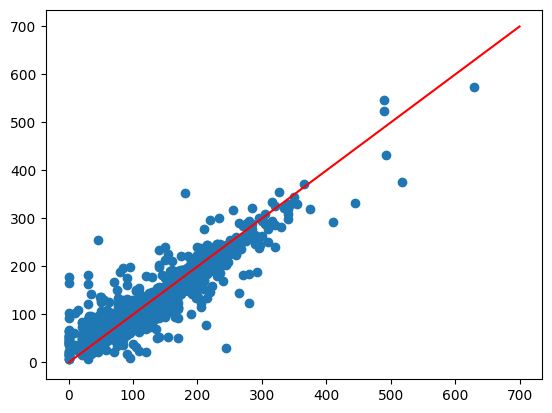

In [53]:
plt.scatter(y_test, y_pred)
plt.plot([0, 700], [0, 700], color = 'red')

In [54]:
cursor.execute('SELECT "FeV" FROM "data"')
res = cursor.fetchall()
y = []

for item in res:
    if (item[0] == item[0]):
        y.append(item[0])

cursor.execute('SELECT "TotalIngotsWeight", "V_Last_EOP", "V_Final_basic", "V_Final", "E3", "OSIKRO3", "OCR12", "VCMO230", "PK5", "UTOPMO2", "EMCR", "E6", "OCR12VM OSTRUŽKI", "OCR12SP", "PT181", "CRV", "E8", "PK2", "OSIKRO4", "PT929", "UTOP1", "OH252", "CRMO OSTRUŽKI", "PK5M", "OCR12VM", "OH255", "E40", "ECN150", "UTOP2", "UTOPMO4", "31CRV3", "PV_MKK", "PV_PO102", "PV_OCR12SPW", "PV_OCR8W", "PV_PO180", "PV_PT181", "PV_PT202", "PV_PT212", "PV_OH239", "PV_OSIKRO3", "PV_OW4", "PV_OCR8VMS", "PV_CRV3", "PV_OH250", "PV_OH252", "PV_OH255", "PV_OH257", "PV_OH258", "PV_OH260", "PV_OH236NI", "PV_UTOPMONI", "PV_PKTB", "PV_PK3NI", "PV_PK332", "PV_PK335", "PV_PK338", "PV_PK340", "PV_PK11S", "PV_PK343", "PV_18MNCR4", "PV_PK346", "PV_INVAR36", "PV_EMCR", "PV_SIVA_LITINA", "PV_CK10", "PV_OC100EX", "PV_EC80", "PV_VCMO140", "PV_VCMO230", "PV_31CRV3", "PV_ECN150", "PV_ECN35", "PV_VCNMO200", "PV_UTOPNICU", "PV_OH807", "PV_OCR4PR", "PV_OCR12", "PV_OCR12SP", "PV_OCR12EX", "PV_CRV", "PV_TMCN2", "PV_TMCN1", "PV_OSIKRO4", "PV_OW1", "PV_OCR12VM", "PV_CRV2", "PV_OSV1", "PV_OW6", "PV_145V33", "PV_UTOP3", "PV_UTOPMO2", "PV_UTOPEX1", "PV_UTOP1", "PV_UTOP2", "PV_UTOPCO", "PV_UTOPEX3", "PV_UTOPMO4", "PV_UTOPCO2", "PV_OV862", "PV_UTOPMO6", "PV_UTOP33", "PV_UTOPSP", "PV_UTOPCO3", "PV_BRW", "PV_BRW1", "PV_BRC", "PV_BRM2", "PV_BRM1", "PV_BRM", "PV_BRCV", "PV_BRC3", "PV_BRU", "PV_BRCMO", "PV_BRCMO2", "PV_UTOPTI", "PV_12MN", "PV_PK2", "PV_RAVNIN2", "PV_RAVNIN3", "PV_RAVNIN4", "PV_PK2SP", "PV_PK11", "PV_PK12", "PV_PK13", "PV_PKAS", "PV_PK15", "PV_PK19", "PV_PK20", "PV_PT929", "PV_PK5", "PV_PK5M", "PV_28304N", "PV_PK939", "PV_X45", "PV_PK942", "PV_RAVNAL2", "PV_PK10", "PV_19MNCR18", "PV_214N", "PV_OCR8W_OSTRUŽKI", "PV_CRV3_OSTRUŽKI", "PV_PK335_OSTRUŽKI", "PV_CRMO_OSTRUŽKI", "PV_CRMO_DROBIŽ", "PV_VCNMO200_DROBIŽ", "PV_TMCN2_OSTRUŽKI", "PV_OCR12VM_OSTRUŽKI", "PV_POSEBNA_JEKLA_OSTRUŽKI", "PV_BRM2_OSTRUŽKI", "PV_E1", "PV_E3", "PV_E6", "PV_E8", "PV_Kore", "PV_GRODELJ", "PV_E40" FROM "data"')
res = cursor.fetchall()

x = []
for row in res:
    if (row[1] == row[1]) and (row[2] == row[2]):
        print(row)
        x.append(row)

(48960.0, 0.198, 0.0, 0.96, 0.0, 0.0, 0.0, 0.0, 0.0, 15000.0, 0.0, 8800.0, 8000.0, 0.0, 0.0, 0.0, 0.0, 10000.0, 0.0, 0.0, 0.0, 5000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8000, 0, 0, 0, 0, 8800, 0, 0, 0, 0)
(44290.0, 0.173, 0.0, 0.75, 0.0, 0.0, 0.0, 0.0, 0.0, 15000.0, 0.0, 3800.0, 7200.0, 0.0, 0.0, 0.0, 0.0, 15000.0, 0.0, 0.0, 0.0, 3000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [55]:
regrV = RandomForestRegressor(max_depth = 13, random_state = 0)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 42)

In [57]:
regrV.fit(X_train, y_train)

RandomForestRegressor(max_depth=13, random_state=0)

In [58]:
y_pred = regr.predict(X_test)

In [59]:
print((y_pred - y_test).sum() / len(y_pred))

20.110433975113686


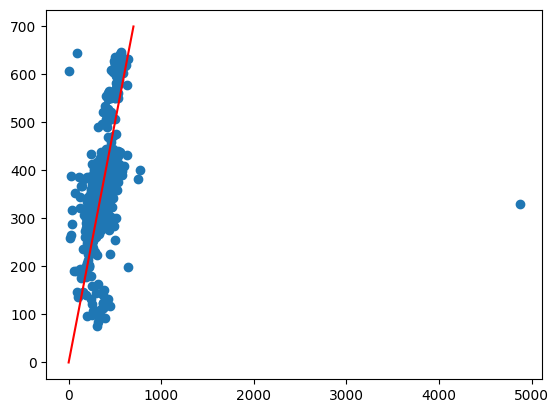

In [60]:
plt.scatter(y_test, y_pred)
plt.plot([0, 700], [0, 700], color = 'red')